## Data Explorartion

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

#### Load COVID-19 metadata

In [177]:
df = pd.read_csv("~/COVID-19 X-ray images/metadata.csv")
df.shape

(372, 29)

#### Print column names

In [178]:
print(df.columns)

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'survival', 'intubated',
       'intubation_present', 'went_icu', 'in_icu', 'needed_supplemental_O2',
       'extubated', 'temperature', 'pO2_saturation', 'leukocyte_count',
       'neutrophil_count', 'lymphocyte_count', 'view', 'modality', 'date',
       'location', 'folder', 'filename', 'doi', 'url', 'license',
       'clinical_notes', 'other_notes', 'Unnamed: 28'],
      dtype='object')


#### Rename the columns 

In [179]:
df.rename(columns = {"patientid": "PatientId", "offset" : "Offset", "sex": "Gender", "age": "Age"}, inplace = True)
df.columns

Index(['PatientId', 'Offset', 'Gender', 'Age', 'finding', 'survival',
       'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 28'],
      dtype='object')

#### Types of respiratory disease

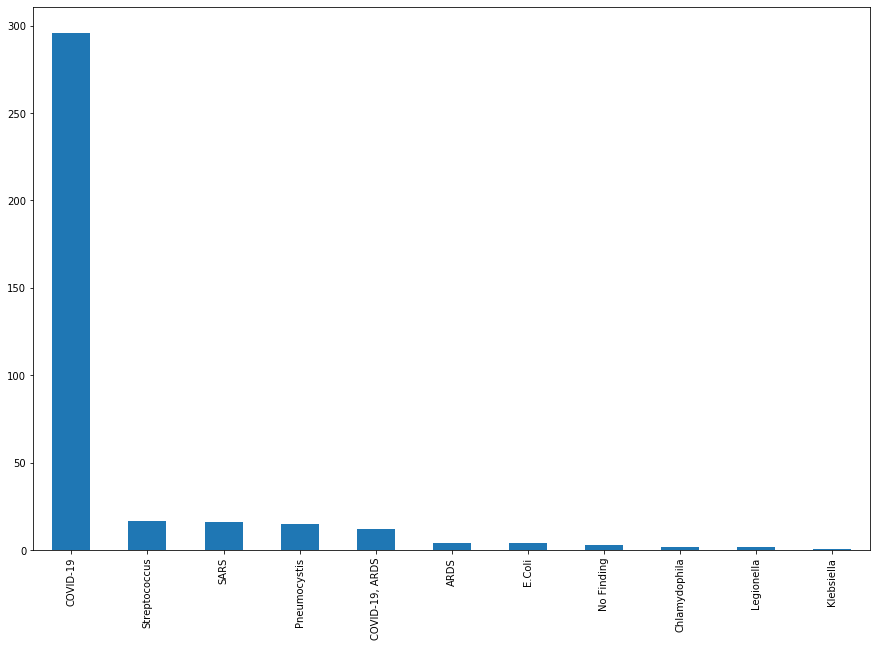

In [180]:
df['finding'].value_counts().plot(kind='bar', figsize=(15,10))
plt.show()

#### Counts of each respiratory disease

In [181]:
df['finding'].value_counts()

COVID-19          296
Streptococcus      17
SARS               16
Pneumocystis       15
COVID-19, ARDS     12
ARDS                4
E.Coli              4
No Finding          3
Chlamydophila       2
Legionella          2
Klebsiella          1
Name: finding, dtype: int64

#### Checking value counts of all features

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientId               372 non-null    int64  
 1   Offset                  276 non-null    float64
 2   Gender                  329 non-null    object 
 3   Age                     318 non-null    float64
 4   finding                 372 non-null    object 
 5   survival                116 non-null    object 
 6   intubated               72 non-null     object 
 7   intubation_present      77 non-null     object 
 8   went_icu                35 non-null     object 
 9   in_icu                  7 non-null      object 
 10  needed_supplemental_O2  12 non-null     object 
 11  extubated               23 non-null     object 
 12  temperature             35 non-null     float64
 13  pO2_saturation          44 non-null     float64
 14  leukocyte_count         11 non-null     fl

#### Validating missing value

In [183]:
df.isnull().sum(axis=0)

PatientId                   0
Offset                     96
Gender                     43
Age                        54
finding                     0
survival                  256
intubated                 300
intubation_present        295
went_icu                  337
in_icu                    365
needed_supplemental_O2    360
extubated                 349
temperature               337
pO2_saturation            328
leukocyte_count           361
neutrophil_count          370
lymphocyte_count          362
view                        0
modality                    0
date                       81
location                  118
folder                      0
filename                    0
doi                       268
url                         0
license                   166
clinical_notes             10
other_notes               138
Unnamed: 28               368
dtype: int64

#### Replace missing values with mean 

In [184]:
df.fillna(df.mean())

,PatientId,Offset,Gender,Age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,22-Jan-20,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,25-Jan-20,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,27-Jan-20,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,28-Jan-20,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,25-Jan-20,"Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,205,11.0,M,55.0,COVID-19,Y,NaN,Y,Y,Y,...,NaN,"North Derbyshire, UK",images,covid-19-pneumonia-progression-and-regression-...,NaN,https://radiopaedia.org/cases/covid-19-pneumon...,CC BY-NC-SA,"ITU admission, Endotracheal tube, nasogastric ...","Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN
368,205,13.0,M,55.0,COVID-19,Y,NaN,Y,Y,Y,...,NaN,"North Derbyshire, UK",images,covid-19-pneumonia-progression-and-regression-...,NaN,https://radiopaedia.org/cases/covid-19-pneumon...,CC BY-NC-SA,Lines and tubes suitably sited. Minor regress...,"Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN
369,205,20.0,M,55.0,COVID-19,Y,NaN,Y,Y,Y,...,NaN,"North Derbyshire, UK",images,covid-19-pneumonia-progression-and-regression-...,NaN,https://radiopaedia.org/cases/covid-19-pneumon...,CC BY-NC-SA,increasing oxygen requirements. Extubated. Po...,"Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN
370,205,24.0,M,55.0,COVID-19,Y,NaN,N,Y,Y,...,NaN,"North Derbyshire, UK",images,covid-19-pneumonia-progression-and-regression-...,NaN,https://radiopaedia.org/cases/covid-19-pneumon...,CC BY-NC-SA,Extubated since the prior radiograph. Partial...,"Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN


#### Generating descriptive statistic 

In [185]:
df.describe()

,PatientId,Offset,Age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,372.000000,276.000000,318.000000,35.000000,44.000000,11.000000,2.000000,10.000000
mean,100.362903,6.641304,55.993711,39.794286,87.961364,5.454545,3.590000,0.879100
std,62.066915,7.155288,15.779233,9.641087,11.187435,2.954828,2.771859,0.440806
min,2.000000,-5.000000,12.000000,36.400000,50.000000,0.220000,1.630000,0.131000
25%,42.750000,2.000000,45.000000,37.800000,84.750000,3.140000,2.610000,0.647500
50%,96.500000,5.000000,56.000000,38.000000,92.000000,6.370000,3.590000,0.800000
75%,159.250000,9.000000,70.000000,38.950000,96.000000,6.875000,4.570000,1.125000
max,205.000000,35.000000,88.000000,95.000000,98.000000,11.200000,5.550000,1.730000


#### Calculate patient counts as per AGE group

In [186]:
grp = [0,10,19,26,36,46,56,66,80,120]
labels = ['Less than 10','10-18','19-25','26-35','36-45','46-55','56-65','65-80', 'more than 80']
df['AgeGroup'] = pd.cut(df['Age'], bins=grp, labels=labels, right=False)

df.groupby(['AgeGroup'])['PatientId'].count()

AgeGroup
Less than 10     0
10-18            1
19-25           13
26-35           30
36-45           44
46-55           69
56-65           61
65-80           85
more than 80    15
Name: PatientId, dtype: int64

#### Converting String type to Boolean type. Taking True with patient's having COVID-19 and False with other finding

In [187]:
# COVID-19
df['finding'] = df['finding'].apply(lambda x: True if x in ['COVID-19', 'COVID-19, ARDS'] else False)

#### Gender wise distribution of patient having COVID-19 or not

In [188]:
gender_dist = pd.DataFrame(df.groupby(['Gender','finding'])['PatientId'].count()).reset_index()
gender_dist

,Gender,finding,PatientId
0,F,False,30
1,F,True,88
2,M,False,29
3,M,True,182


#### Calculate Gender wise distribution having covid-19 or not

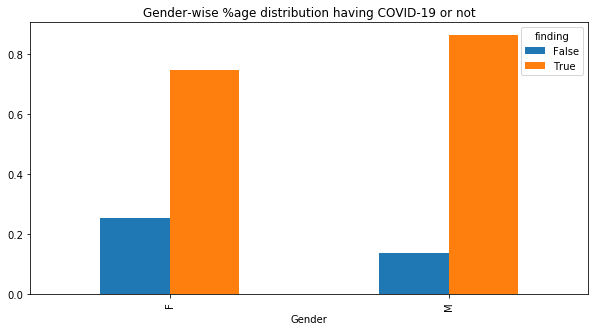

In [189]:
gender = df.groupby('Gender')['finding'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
gender.set_title("Gender-wise %age distribution having COVID-19 or not")
plt.show()

#### Calculate Offset (number of days) patients having covid-19 or not

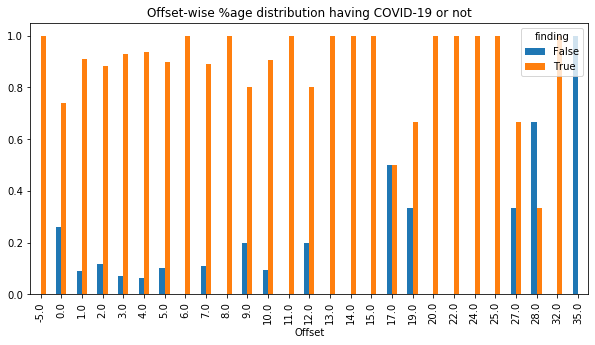

In [190]:
offset = df.groupby('Offset')['finding'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
offset.set_title("%age of number of days patients having COVID-19 or not")
plt.show()

#### Calculate survival rate of patients having covid-19 or not

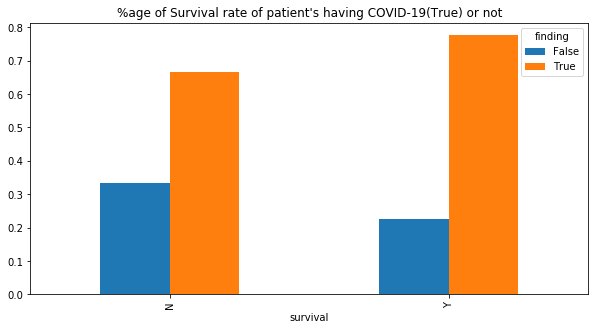

In [191]:
survival = df.groupby('survival')['finding'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
survival.set_title("%age of Survival rate of patient's having COVID-19(True) or not")
plt.show()

#### Calculate %age distribution of COVID-19 based on location

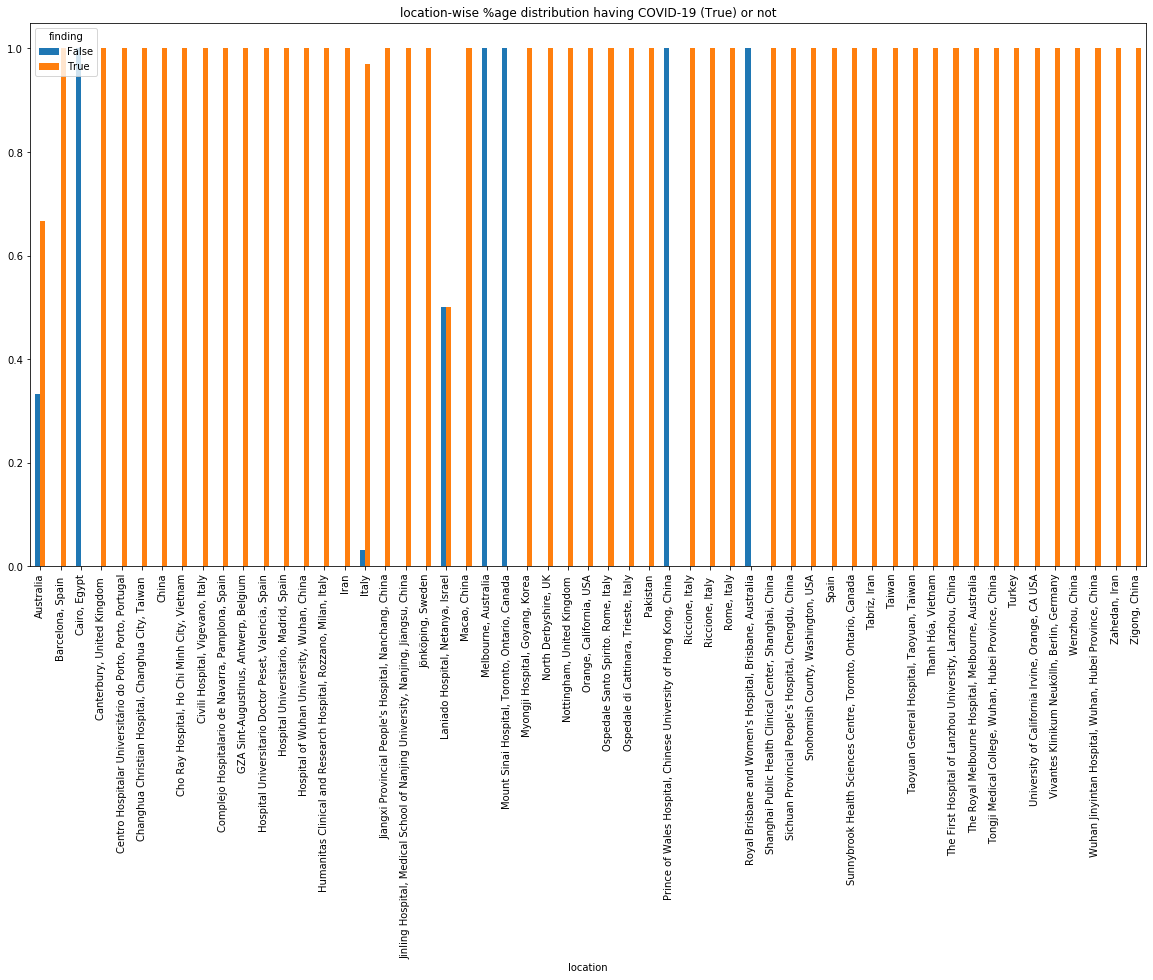

In [192]:
location = df.groupby('location')['finding'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,10))
location.set_title("location-wise %age distribution having COVID-19 (True) or not")
plt.show()

#### Calculate if the patient was intubated at any point during illness or Not

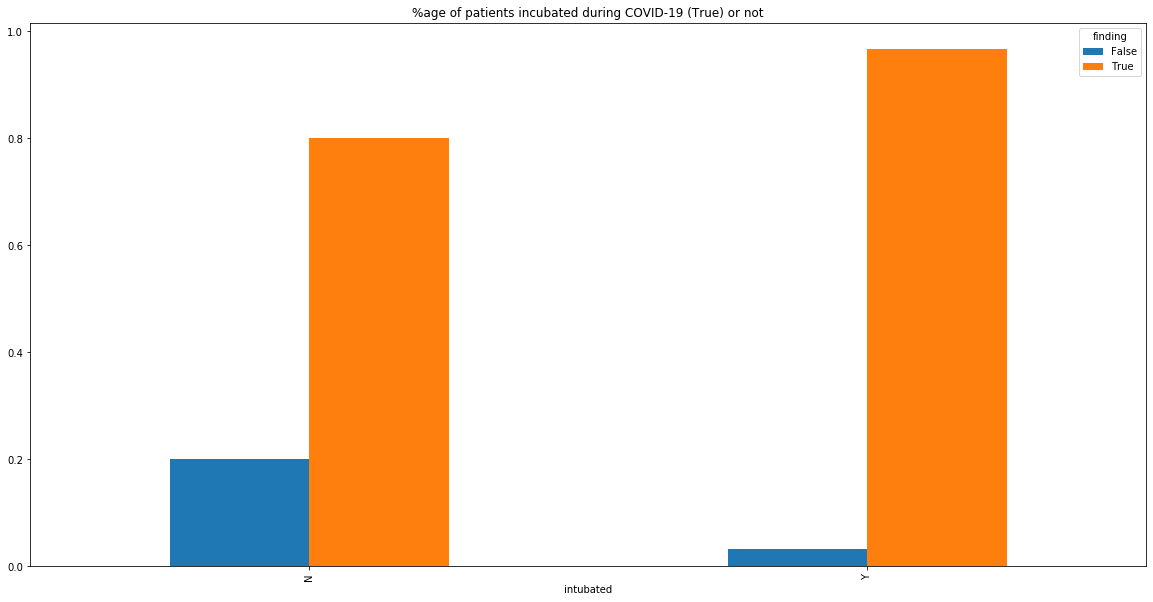

In [193]:
intubated = df.groupby('intubated')['finding'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,10))
intubated.set_title("%age of patients incubated during COVID-19 (True) or not")
plt.show()

#### Calculate if intubation present or not

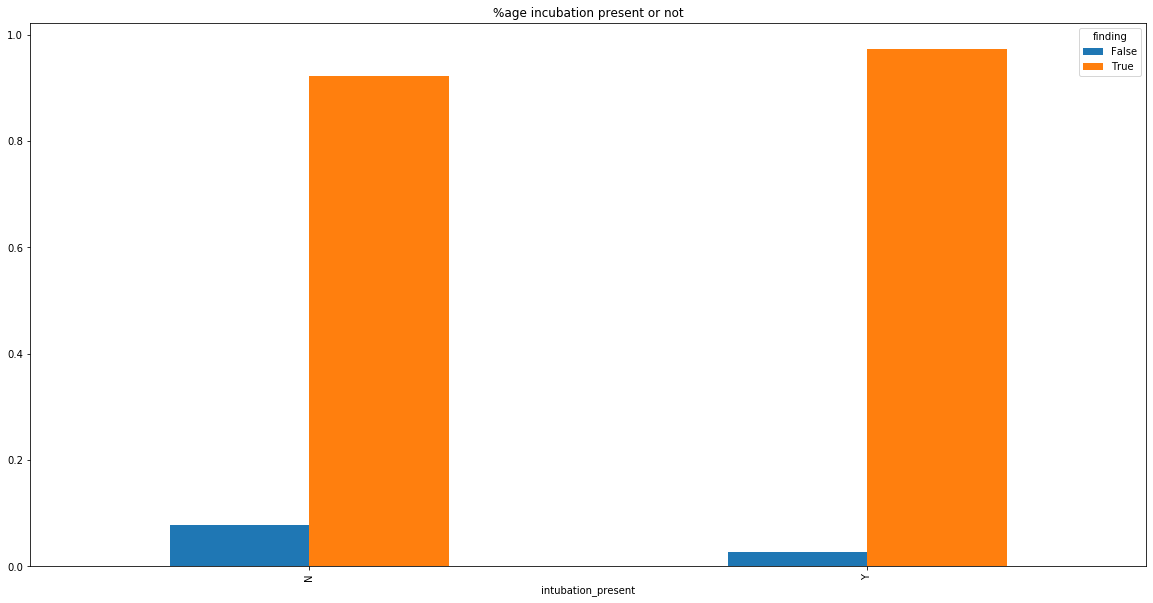

In [194]:
intubation_present = df.groupby('intubation_present')['finding'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,10))
intubation_present.set_title("%age incubation present or not")
plt.show()

#### Calculate temprature based on COVID-19 patient's and others 

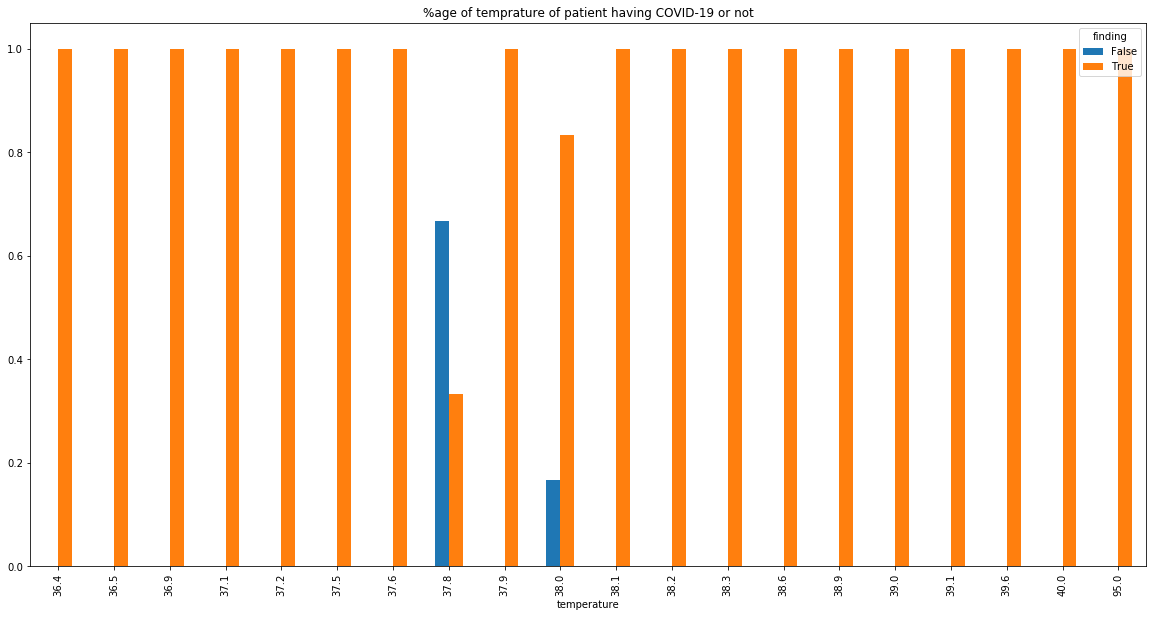

In [195]:
temperature = df.groupby('temperature')['finding'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,10))
temperature.set_title("%age of temprature of patient having COVID-19 or not")
plt.show()